In [1]:
# import libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# import training and test data 


file_location_train = "location on your local drive"
training_data = pd.read_csv(file_location_train)


file_location_test = "location on your local drive"
testing_data = pd.read_csv(file_location_test)


data = pd.concat([training_data, testing_data], ignore_index=True)

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Split Explantory Variables into Categorical and Numerical

In [6]:
df_num = training_data[["Age", "SibSp", "Parch", "Fare"]]

df_cat = training_data[["Pclass", "Sex", "Embarked"]]

df_unknown = training_data[["Name", "Ticket", "Cabin"]]

### Plots for Pclass Variables

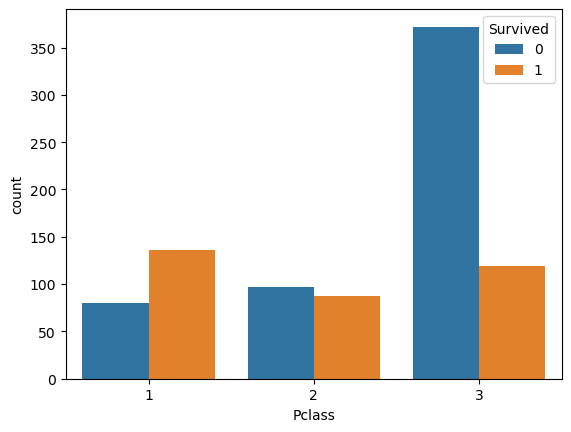

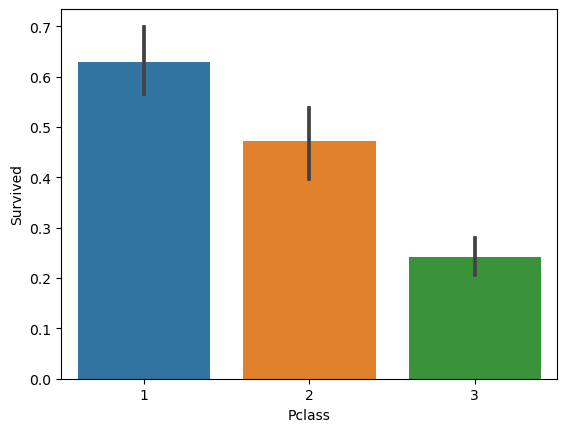

In [7]:
sns.countplot(  x="Pclass", hue="Survived", data=training_data)
plt.show()
sns.barplot(x="Pclass", y="Survived", data=training_data)
plt.show()

### Plots for Sex Variables

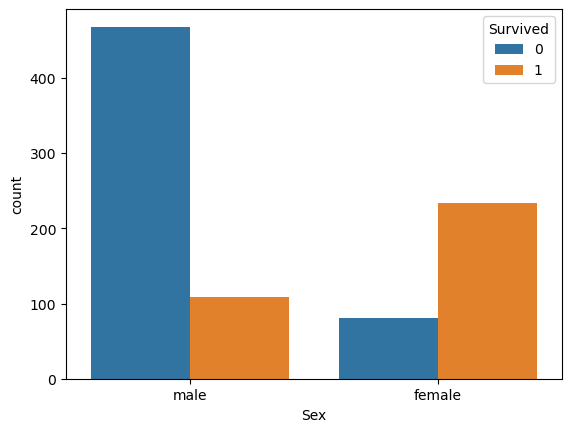

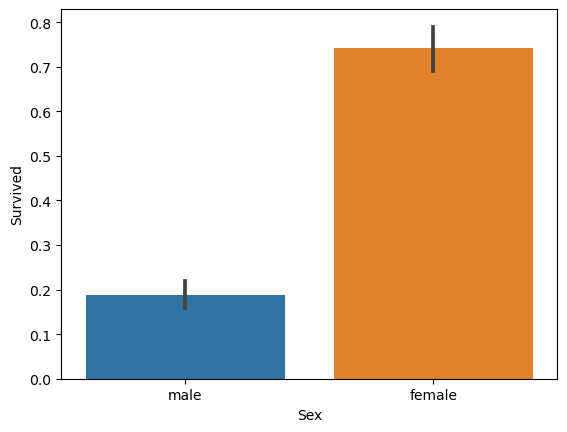

In [8]:
sns.countplot(x="Sex", hue="Survived", data=training_data)
plt.show()
sns.barplot(x="Sex", y="Survived", data=training_data)
plt.show()

### Plots for Embarked Variables

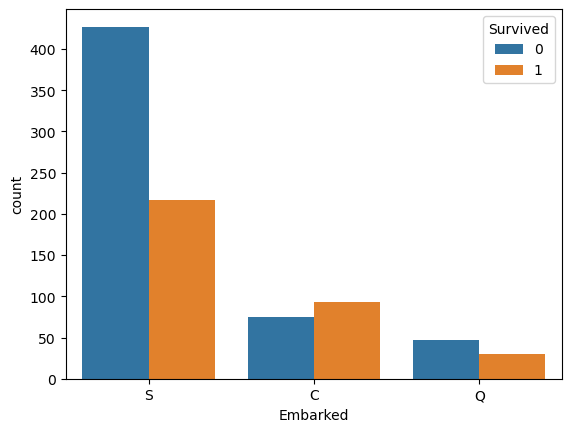

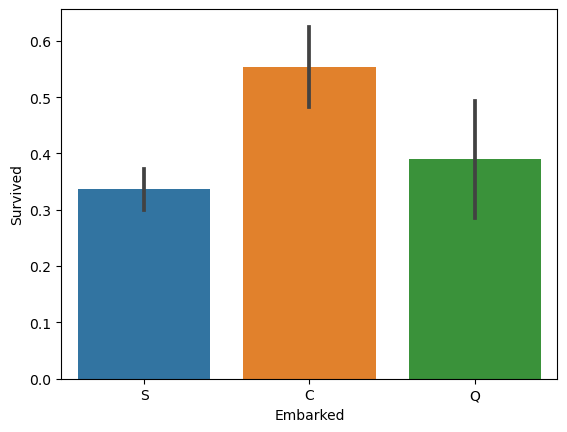

In [9]:
sns.countplot(x="Embarked", hue="Survived", data=training_data)
plt.show()
sns.barplot(x="Embarked", y="Survived", data=training_data)
plt.show()

### Plots for Age 

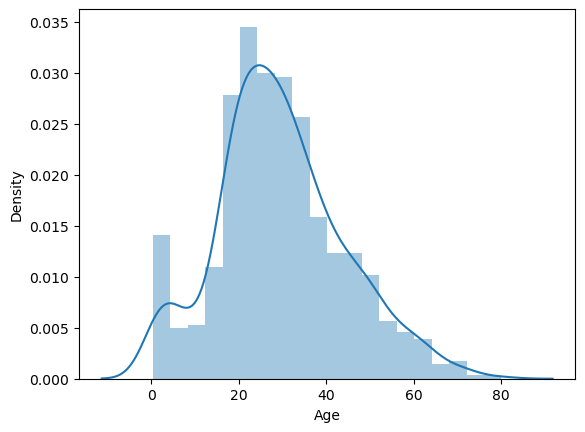

In [10]:
sns.distplot(df_num["Age"])
plt.show()

In [11]:
df_num["Age"].skew()

0.38910778230082704

### Plots for SibSp

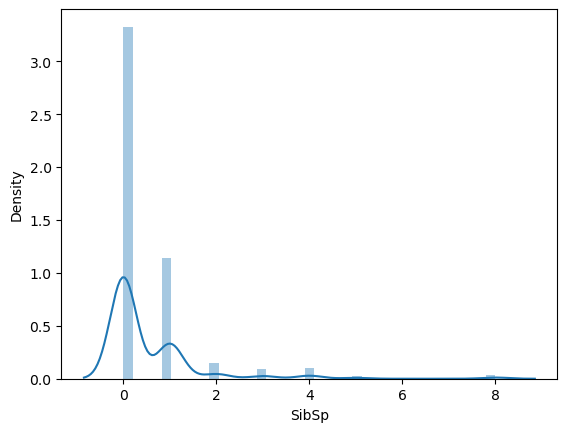

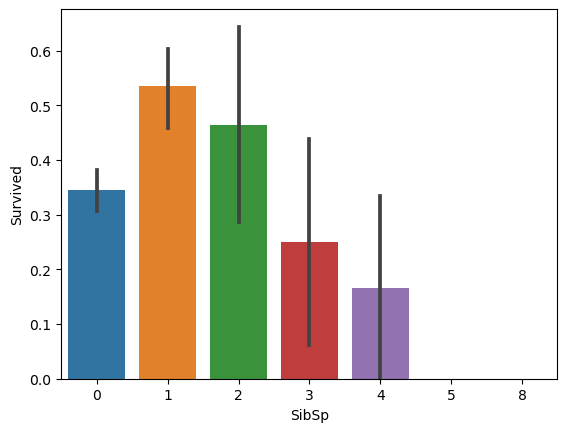

In [12]:
sns.distplot(df_num["SibSp"])
plt.show()
sns.barplot(x="SibSp", y="Survived", data=training_data)
plt.show()

In [13]:
df_num["SibSp"].skew()

3.6953517271630565

### Plots for Parch

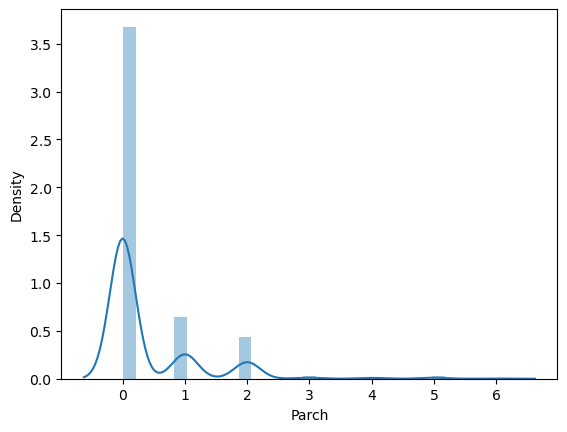

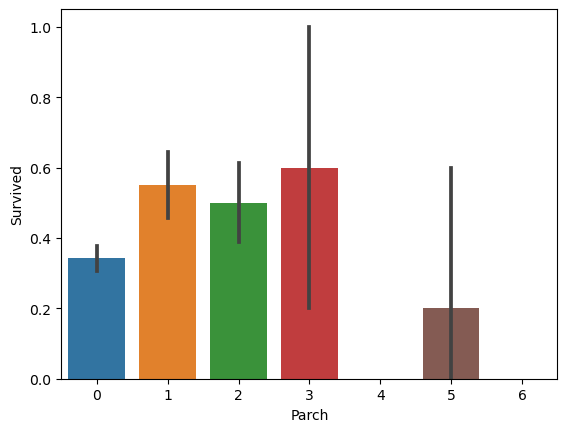

In [14]:
sns.distplot(df_num["Parch"])
plt.show()
sns.barplot(x="Parch", y="Survived", data=training_data)
plt.show()

In [18]:
df_num["Parch"].skew()

2.7491170471010933

### Plots for Fare

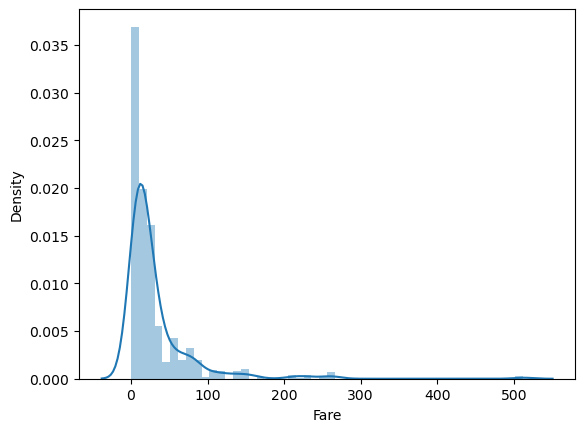

In [19]:
sns.distplot(df_num["Fare"])
plt.show()

In [20]:
df_num["Fare"].skew()

4.787316519674893

 - There are two variables with missing values:
     1. Age
     2. Embarked

 - I will find the variable that correlates best with these variables, Select a subset based on the best correlated variable and take the mean for Age and mode for Embarked. 

In [21]:
training_impute = training_data.copy()

In [22]:
# Check number of of missing ages 

age_nan_indices = list(training_impute[training_impute["Age"].isnull()].index)
len(age_nan_indices)

177

In [23]:
#  Loop through list and impute missing ages 

for index in age_nan_indices:
    median_age = training_impute["Age"].median()
    predict_age = training_impute["Age"][(training_impute["SibSp"] == training_impute.iloc[index]["SibSp"])
                                & (training_impute["Parch"] == training_impute.iloc[index]["Parch"])
                                & (training_impute["Pclass"] == training_impute.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        training_impute["Age"].iloc[index] = median_age
    else:
        training_impute["Age"].iloc[index] = predict_age

In [24]:
# Check number of missing embarked

embarked_nan_indices = list(training_impute[training_impute["Embarked"].isnull()].index)
len(embarked_nan_indices)

2

In [25]:
# loop through list and impute missing embarked values 

for index in embarked_nan_indices:
   
    mode_embarked = training_impute["Embarked"].mode()
    training_impute["Embarked"].iloc[index] = mode_embarked[0]
    

## New Variables Via Feature Engineering

1. isAdult - Categorical variable identifying whether the individual is an adult or not - (1,0)
2. logFare - Numerical variable applying a log transformation to the Fare variable 
3. Title - Categorical variable identifying the different title of individuals - (Mr, Mrs, Miss, Rare, Master, N)
4. isAlone - Categorical variable identifying whether or not the individual is traveling alone or not - (1,0)
5. Cabin - Categorical variable identifying the cabin which the indivudual is in - (B,C,D,E,F,G,N)
6. Ticket_Numeric - Categorical variable identifying whether the Ticket only contains numbers or not - (1,0)

In [26]:
isAdult_impute = [1 if age >= 18.0 else 0 for age in training_impute["Age"] ]

In [27]:
logFare_impute = [np.log(fare + 1) for fare in training_impute["Fare"]]

In [28]:
title_impute = [str(i.split(",")[1].split(".")[0]) for i in training_impute["Name"] ]

In [29]:
title_impute = [i.replace("Mlle", "Miss").replace("Ms", "Miss") for i in title_impute]
title_impute = [i.replace("Mme", "Mrs") for i in title_impute]
title_impute = [i.replace("Dr", "Rare").replace("Rev", "Rare").replace("Col", "Rare").replace("Major", "Rare").replace("Lady", "Rare").replace("Jonkheer", "Rare").replace("Don", "Rare").replace("Capt", "Rare").replace("Capt", "Rare").replace("the Countess", "Rare").replace("Sir", "Rare").replace("Done", "Rare") for i in title_impute]

In [30]:
totalFamily_impute = [training_impute.Parch[i] + training_impute.SibSp[i] for i in range(len(training_impute))]
isAlone_impute = [0 if i > 0 else 1 for i in totalFamily_impute]

In [31]:
training_impute["Cabin"].fillna("Nan", inplace=True)

In [32]:
cabin_letter_impute = [list(i)[0] for i in training_impute["Cabin"]]
#cabin_letter_dropped = [list(i)[0] for i in training_dropped["Cabin"]]

In [33]:
ticketNumeric_impute = [1 if i.isdigit() else 0 for i in training_impute["Ticket"]]
#ticketNumeric_dropped = [1 if i.isdigit() else 0 for i in training_dropped["Ticket"]]

- Add New Features to dropped and imputed training dataset

In [36]:
training_impute["isAdult"] = isAdult_impute
training_impute["logFare"] = logFare_impute
training_impute["title"] = title_impute
training_impute["isAlone"] = isAlone_impute
training_impute["cabin_letter"] = cabin_letter_impute
training_impute["ticketNumeric"] = ticketNumeric_impute

In [37]:
training_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          891 non-null    object 
 11  Embarked       891 non-null    object 
 12  isAdult        891 non-null    int64  
 13  logFare        891 non-null    float64
 14  title          891 non-null    object 
 15  isAlone        891 non-null    int64  
 16  cabin_letter   891 non-null    object 
 17  ticketNumeric  891 non-null    int64  
dtypes: float64

In [38]:
training_impute.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAdult,logFare,title,isAlone,cabin_letter,ticketNumeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Nan,S,1,2.110213,Mr,0,N,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.280593,Mrs,0,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Nan,S,1,2.188856,Miss,1,N,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.990834,Mrs,0,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Nan,S,1,2.202765,Mr,1,N,1


### Preprocessing for training data with dropped missing data - With imputed Data 

In [39]:
df_impute = pd.get_dummies(columns=["Sex","Embarked", "cabin_letter", "title"], data=training_impute)

In [40]:
df_impute.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'isAdult', 'logFare', 'isAlone',
       'ticketNumeric', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'cabin_letter_A', 'cabin_letter_B', 'cabin_letter_C',
       'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G',
       'cabin_letter_N', 'cabin_letter_T', 'title_ Master', 'title_ Miss',
       'title_ Mr', 'title_ Mrs', 'title_ Rare'],
      dtype='object')

In [41]:
df_impute = df_impute.drop(["Sex_female", "cabin_letter_N", "Embarked_S", "title_ Rare",  "PassengerId", "Ticket", "Name", "Cabin"], axis = 1)

In [42]:
df_impute.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,isAdult,logFare,isAlone,ticketNumeric,...,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,title_ Master,title_ Miss,title_ Mr,title_ Mrs
0,0,3,22.0,1,0,7.2500,1,2.110213,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,4.280593,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,2.188856,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,3.990834,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,2.202765,1,1,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df_impute.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'isAdult',
       'logFare', 'isAlone', 'ticketNumeric', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'cabin_letter_A', 'cabin_letter_B', 'cabin_letter_C',
       'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G',
       'cabin_letter_T', 'title_ Master', 'title_ Miss', 'title_ Mr',
       'title_ Mrs'],
      dtype='object')

## Drop Outliers from Dropped and Impute Dataset

In [44]:
# Function to detect and remove outliers in numerical variables 
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df.loc[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key,value in outlier_indices.items() if value  > n)
    return multiple_outliers


In [45]:
outliers_to_drop_impute =  detect_outliers(df_impute, 2, ["Age", "SibSp", "Parch", "Fare"])
print("We Will Drop These {} Indices: ".format(len(outliers_to_drop_impute)), outliers_to_drop_impute)

We Will Drop These 16 Indices:  [268, 305, 438, 587, 659, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [46]:
df_impute_outlier = df_impute.drop(outliers_to_drop_impute, axis = 0).reset_index(drop = True)

## 2 Datasets

In [47]:
df_impute_outlier.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,isAdult,logFare,isAlone,ticketNumeric,...,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,title_ Master,title_ Miss,title_ Mr,title_ Mrs
0,0,3,22.0,1,0,7.2500,1,2.110213,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,4.280593,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,2.188856,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,3.990834,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,2.202765,1,1,...,0,0,0,0,0,0,0,0,1,0


In [48]:
df_impute.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,isAdult,logFare,isAlone,ticketNumeric,...,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,title_ Master,title_ Miss,title_ Mr,title_ Mrs
0,0,3,22.0,1,0,7.2500,1,2.110213,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,4.280593,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,2.188856,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,3.990834,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,2.202765,1,1,...,0,0,0,0,0,0,0,0,1,0


## Model - Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [50]:
X = df_impute.drop(["Survived", "Fare"], axis = 1)
y = df_impute["Survived"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
logReg = LogisticRegression()

In [53]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [54]:
logReg.score(X_test, y_test)

0.8156424581005587

In [55]:
cv = cross_val_score(logReg, X_test, y_test, cv=5)
print("Cross Validation Mean Score: {}".format(cv.mean()))

Cross Validation Mean Score: 0.8101587301587301


# Preparing Data for Submission

In [56]:
impute = data.copy()

In [57]:
impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [58]:
impute

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [59]:
# Check number of missing ages 

age_nan_indices = list(impute[impute["Age"].isnull()].index)
len(age_nan_indices)

263

In [60]:
#  Loop through list and impute missing ages 

for index in age_nan_indices:
    median_age = impute["Age"].median()
    predict_age = impute["Age"][(impute["SibSp"] == impute.iloc[index]["SibSp"])
                                & (impute["Parch"] == impute.iloc[index]["Parch"])
                                & (impute["Pclass"] == impute.iloc[index]["Pclass"])].median()
    
    if np.isnan(predict_age):
        impute["Age"].iloc[index] = median_age
    else:
        impute["Age"].iloc[index] = predict_age

In [61]:
import statistics as s

impute["Fare"].fillna(s.median(impute["Fare"]), inplace=True)

In [62]:
# Check number of missing embarked

embarked_nan_indices = list(impute[impute["Embarked"].isnull()].index)
len(embarked_nan_indices)

2

In [63]:
# loop through list and impute missing embarked values 

for index in embarked_nan_indices:
   
    mode_embarked = impute["Embarked"].mode()
    impute["Embarked"].iloc[index] = mode_embarked[0]

In [64]:
isAdult_impute = [1 if age >= 18.0 else 0 for age in impute["Age"] ]

In [65]:
logFare_impute = [np.log(fare + 1) for fare in impute["Fare"]]

In [66]:
title_impute = [str(i.split(",")[1].split(".")[0]) for i in impute["Name"] ]

In [67]:
title_impute = [i.replace("Mme", "Mrs") for i in title_impute]
title_impute = [i.replace("Mlle", "Miss").replace("Ms", "Miss") for i in title_impute]
title_impute = [i.replace("Dr","Rare").replace("Rev","Rare").replace("Col","Rare").replace("Major","Rare").replace("Lady","Rare").replace("Jonkheer","Rare").replace("Don","Rare").replace("Capt","Rare").replace("the Countess","Rare").replace("Sir","Rare").replace("Dona","Rare") for i in title_impute]



In [68]:
totalFamily = [impute.Parch[i] + impute.SibSp[i] for i in range(len(impute))]

In [69]:
isAlone_impute = [0 if i > 0 else 1 for i in totalFamily]


In [70]:
impute["Cabin"].fillna("Nan", inplace=True)

In [71]:
cabin_letter_impute = [list(i)[0] for i in impute["Cabin"]]

In [72]:
ticketNumeric_impute = [1 if i.isdigit() else 0 for i in impute["Ticket"]]

In [73]:
impute["isAdult"] = isAdult_impute
impute["logFare"] = logFare_impute
impute["title"] = title_impute
impute["isAlone"] = isAlone_impute
impute["cabin_letter"] = cabin_letter_impute
impute["ticketNumeric"] = ticketNumeric_impute

In [74]:
impute = pd.get_dummies(columns=["Sex","cabin_letter", "Embarked", "title"], data=impute)

In [75]:
impute = impute.drop(["Fare", "Sex_female", "cabin_letter_N", "Embarked_S", "title_ Rare", "Ticket", "Name", "Cabin"], axis = 1)

In [76]:
impute.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,isAdult,logFare,isAlone,ticketNumeric,...,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rarea
0,1,0.0,3,22.0,1,0,1,2.110213,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,38.0,1,0,1,4.280593,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,1.0,3,26.0,0,0,1,2.188856,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1.0,1,35.0,1,0,1,3.990834,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,0.0,3,35.0,0,0,1,2.202765,1,1,...,0,0,0,0,0,0,0,1,0,0


In [77]:
impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Age             1309 non-null   float64
 4   SibSp           1309 non-null   int64  
 5   Parch           1309 non-null   int64  
 6   isAdult         1309 non-null   int64  
 7   logFare         1309 non-null   float64
 8   isAlone         1309 non-null   int64  
 9   ticketNumeric   1309 non-null   int64  
 10  Sex_male        1309 non-null   uint8  
 11  cabin_letter_A  1309 non-null   uint8  
 12  cabin_letter_B  1309 non-null   uint8  
 13  cabin_letter_C  1309 non-null   uint8  
 14  cabin_letter_D  1309 non-null   uint8  
 15  cabin_letter_E  1309 non-null   uint8  
 16  cabin_letter_F  1309 non-null   uint8  
 17  cabin_letter_G  1309 non-null   u

In [78]:
train = impute[:len(training_data)]
test = impute[len(training_data):]

In [79]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,isAdult,logFare,isAlone,ticketNumeric,...,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rarea
0,1,0.0,3,22.0,1,0,1,2.110213,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,38.0,1,0,1,4.280593,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,1.0,3,26.0,0,0,1,2.188856,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1.0,1,35.0,1,0,1,3.990834,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,0.0,3,35.0,0,0,1,2.202765,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,0,0,1,2.639057,1,1,...,0,0,0,0,0,0,0,0,0,0
887,888,1.0,1,19.0,0,0,1,3.433987,1,1,...,0,0,0,0,0,0,1,0,0,0
888,889,0.0,3,13.5,1,2,0,3.196630,0,0,...,0,0,0,0,0,0,1,0,0,0
889,890,1.0,1,26.0,0,0,1,3.433987,1,1,...,0,0,0,1,0,0,0,1,0,0


In [80]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,isAdult,logFare,isAlone,ticketNumeric,...,cabin_letter_F,cabin_letter_G,cabin_letter_T,Embarked_C,Embarked_Q,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rarea
891,892,NaN,3,34.5,0,0,1,2.178064,1,1,...,0,0,0,0,1,0,0,1,0,0
892,893,NaN,3,47.0,1,0,1,2.079442,0,1,...,0,0,0,0,0,0,0,0,1,0
893,894,NaN,2,62.0,0,0,1,2.369075,1,1,...,0,0,0,0,1,0,0,1,0,0
894,895,NaN,3,27.0,0,0,1,2.268252,1,1,...,0,0,0,0,0,0,0,1,0,0
895,896,NaN,3,22.0,1,1,1,2.586824,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,25.0,0,0,1,2.202765,1,0,...,0,0,0,0,0,0,0,1,0,0
1305,1306,NaN,1,39.0,0,0,1,4.699571,1,0,...,0,0,0,1,0,0,0,0,0,1
1306,1307,NaN,3,38.5,0,0,1,2.110213,1,0,...,0,0,0,0,0,0,0,1,0,0
1307,1308,NaN,3,25.0,0,0,1,2.202765,1,1,...,0,0,0,0,0,0,0,1,0,0


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [82]:
X_train = train.drop(["Survived", "PassengerId"], axis = 1)
y_train = train["Survived"]

X_test = test.drop(["Survived" , "PassengerId"], axis=1)
y_test = test[["PassengerId", "Survived"]]

In [83]:
logReg = LogisticRegression()

In [84]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = logReg.predict(X_test)

In [86]:
y_test.head()

,PassengerId,Survived
891,892,NaN
892,893,NaN
893,894,NaN
894,895,NaN
895,896,NaN


In [87]:
submission = y_test.copy()

In [88]:
submission["Survived"] = y_pred

In [89]:
submission["Survived"] = submission["Survived"].astype(int)

In [90]:
submission.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [91]:
save_location_path = "location on your local drive"

submission.to_csv(save_location_path, index=False)
